In [1]:
import geopandas, pandas, numpy as np, glob, scipy.spatial.distance, \
  scipy.cluster.hierarchy, matplotlib.pyplot as plt

In [2]:
pattern = '/g/data/r78/LCCS_Aberystwyth/validation/validation_comparison_completed/validation_comparison_*.shp'
filenames = sorted(glob.glob(pattern))
names = [filename.split('_')[-1][:-4] for filename in filenames]
subtables = [geopandas.read_file(filename)[['classified', 'output']] for filename in filenames]
data = pandas.concat([subtables[0].classified] + 
                     [df.output.rename(name) for name, df in zip(names, subtables)], axis=1)
data

,classified,ChrisO,Eloise,Gabrielle,Norman,Richard,belle,ben,Cate,erin,erinv2,sean
0,111,111,111,111,111,111,111,111,111,111,111,111
1,111,112,112,112,112,112,112,112,112,112,112,112
2,111,111,111,m,111,111,111,111,111,111,111,111
3,111,111,111,111,111,111,111,111,111,111,111,111
4,111,112,112,112,112,112,112,112,112,112,112,112
...,...,...,...,...,...,...,...,...,...,...,...,...
139,220,220,220,220,220,220,220,220,220,220,220,220
140,220,220,220,220,220,220,220,220,220,220,220,220
141,220,124,220,220,220,220,220,220,220,220,112,220
142,220,220,220,220,220,220,220,220,220,220,220,220


In [3]:
clean = data.replace(['m', 'u'], [0, 1]).values.T
dist = scipy.spatial.distance.pdist(clean, 'jaccard')
dist = scipy.spatial.distance.squareform(dist)
dist = pandas.DataFrame((1-dist) * 100, columns=data.columns, index=data.columns)

dist.round(3).style.background_gradient(cmap='cividis_r', axis=None).set_precision(2)

,classified,ChrisO,Eloise,Gabrielle,Norman,Richard,belle,ben,Cate,erin,erinv2,sean
classified,100.00,75.00,83.33,84.72,84.72,84.72,82.64,79.17,87.50,93.75,81.25,83.33
ChrisO,75.00,100.00,83.92,82.64,85.42,77.78,84.72,80.42,84.03,79.17,87.50,81.25
Eloise,83.33,83.92,100.00,89.58,90.97,86.11,90.28,84.72,90.97,85.42,89.58,84.03
Gabrielle,84.72,82.64,89.58,100.00,92.36,85.42,88.89,88.89,93.71,88.19,89.58,89.58
Norman,84.72,85.42,90.97,92.36,100.00,86.81,90.28,90.28,91.67,86.81,91.67,89.58
Richard,84.72,77.78,86.11,85.42,86.81,100.00,84.03,86.11,86.11,86.11,84.03,85.42
belle,82.64,84.72,90.28,88.89,90.28,84.03,100.00,83.33,91.67,85.42,90.97,86.11
ben,79.17,80.42,84.72,88.89,90.28,86.11,83.33,100.00,87.50,81.94,85.42,89.58
Cate,87.50,84.03,90.97,93.71,91.67,86.11,91.67,87.50,100.00,89.58,91.67,89.58
erin,93.75,79.17,85.42,88.19,86.81,86.11,85.42,81.94,89.58,100.00,87.41,88.19


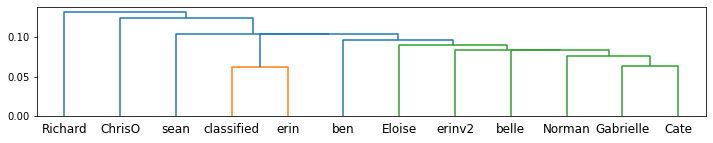

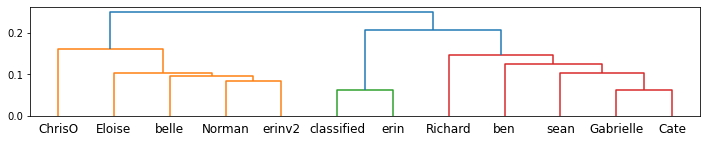

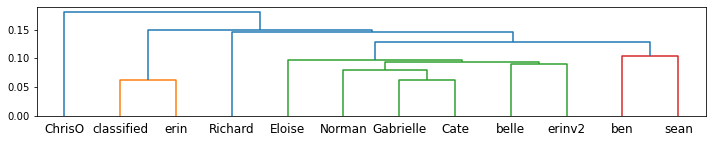

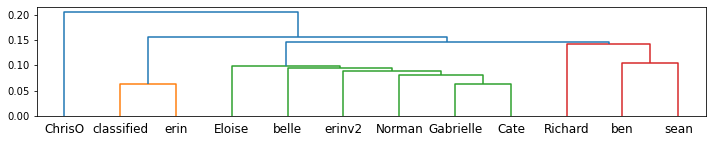

In [4]:
for method in ['single', 'complete', 'average', 'weighted']:
    linkage = scipy.cluster.hierarchy.linkage(clean, method=method, metric='jaccard')
    plt.figure(figsize=(12,2))
    scipy.cluster.hierarchy.dendrogram(linkage, labels=data.columns.to_list())
None